# Predicción de cuotas de apuestas

En este ejercicio vamos a implementar una única red neuronal para predecir las cuotas de victoria, empate y derrota en partidos de fútbol

![img](https://www.ecestaticos.com/image/clipping/6192cd83066e196913e3045d412b937b/multan-a-la-casa-de-apuestas-digital-888-por-el-polemico-anuncio-de-carlos-sobera.jpg)

Los datos de cada casa de apuestas se encuentran en formato JSON dentro de la carpeta `data` con el nombre `bookmakerXXX.json`. Utiliza estos ficheros para crear un único dataframe con el que entrenar y probar el modelo.  
Por último, utiliza el fichero `predicciones.json` para analizar las cuotas de un único partido

In [2]:
import pandas as pd
import numpy as np
import json

In [23]:
import glob
list_paths_json = glob.glob('./data/bookmaker*.json')
list_paths_json

['./data\\bookmaker17.json',
 './data\\bookmaker22.json',
 './data\\bookmaker274.json',
 './data\\bookmaker282.json',
 './data\\bookmaker285.json',
 './data\\bookmaker30.json',
 './data\\bookmaker327.json',
 './data\\bookmaker37.json',
 './data\\bookmaker385.json',
 './data\\bookmaker42.json',
 './data\\bookmaker6.json',
 './data\\bookmaker83.json',
 './data\\bookmaker84.json']

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data') if isfile(join('data', f)) and f[0:4]=='book']
onlyfiles

['bookmaker17.json',
 'bookmaker22.json',
 'bookmaker274.json',
 'bookmaker282.json',
 'bookmaker285.json',
 'bookmaker30.json',
 'bookmaker327.json',
 'bookmaker37.json',
 'bookmaker385.json',
 'bookmaker42.json',
 'bookmaker6.json',
 'bookmaker83.json',
 'bookmaker84.json']

In [32]:
df1x2 = pd.DataFrame()
for file in list_paths_json:
    with open(file) as json_file:
        data = json.load(json_file)
        df = pd.DataFrame.from_dict(data)
        df1x2 = pd.concat([df1x2,df],axis=0)

In [33]:
df1x2

,CoMatch,CoBookmaker,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA
10578,1729828,17,2019-09-11 11:09:13,3913,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.89,0.09,0.02
119314,1677221,17,2019-09-26 19:19:53,4613,0.52,0.27,3,2ST61,76,61.0,0,1,0,0,0.13,0.30,0.57
211966,1693901,17,2019-09-22 12:44:57,6117,0.29,0.30,3,2ST86,101,86.0,0,0,0,0,0.08,0.79,0.13
158689,1767673,17,2019-10-02 16:33:45,1965,0.51,0.25,1,1ST32,32,32.0,0,1,0,0,0.21,0.28,0.51
207804,1694621,17,2019-08-25 20:53:57,4917,0.55,0.27,3,2ST66,81,66.0,1,1,0,0,0.44,0.46,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100949,1724257,84,2019-09-13 21:32:07,5347,0.69,0.19,3,2ST74,89,74.0,1,0,0,0,0.85,0.13,0.02
99925,1677253,84,2019-10-20 14:47:59,2819,0.32,0.29,1,1ST45+,46,46.0,0,1,0,0,0.12,0.26,0.62
71473,1724595,84,2019-09-08 18:37:50,5690,0.40,0.28,3,2ST79,94,79.0,2,2,0,0,0.02,0.16,0.81
232985,1677256,84,2019-10-19 20:34:38,5558,0.16,0.22,3,2ST77,92,77.0,1,0,0,1,0.74,0.21,0.05


In [38]:
df1x2.describe()

,CoMatch,CoBookmaker,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,9694.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.705711e+06,198.140800,2985.280300,0.431227,0.277829,1.852400,49.26420,42.741593,0.446900,0.392400,0.039700,0.028900,0.393787,0.329939,0.276252
std,3.046140e+04,143.794335,1979.310646,0.131598,0.039863,0.979035,32.98975,26.786407,0.673369,0.635344,0.203784,0.169315,0.243532,0.162054,0.218576
min,1.676673e+06,6.000000,2.000000,0.100000,0.060000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,1.677186e+06,42.000000,1386.500000,0.340000,0.260000,1.000000,23.00000,22.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.220000,0.120000
50%,1.694637e+06,282.000000,2354.000000,0.420000,0.290000,1.000000,39.00000,37.000000,0.000000,0.000000,0.000000,0.000000,0.360000,0.310000,0.230000
75%,1.725137e+06,327.000000,5148.000000,0.510000,0.310000,3.000000,85.00000,71.000000,1.000000,1.000000,0.000000,0.000000,0.552500,0.380000,0.350000
max,1.778095e+06,385.000000,6559.000000,0.920000,0.350000,4.000000,109.00000,94.000000,4.000000,4.000000,2.000000,2.000000,0.970000,0.920000,0.990000


In [39]:
df1x2.corr()

,CoMatch,CoBookmaker,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA
CoMatch,1.000000,-0.025599,0.012460,0.017246,-0.183069,0.054454,0.012525,0.001951,0.034607,0.047496,-0.031976,0.008170,-0.006415,0.003844,0.004075
CoBookmaker,-0.025599,1.000000,-0.072385,0.022104,-0.017461,-0.061372,-0.072420,-0.075602,-0.053800,-0.057106,0.008168,-0.013213,-0.010174,0.024390,-0.007166
TsElapsed,0.012460,-0.072385,1.000000,0.016469,0.006383,0.917672,0.999961,0.994052,0.450495,0.420579,0.218583,0.163241,-0.100286,0.305453,-0.114957
VlProbH_ini,0.017246,0.022104,0.016469,1.000000,-0.542747,0.004068,0.016482,0.018931,0.083828,-0.023498,0.060387,0.015285,0.425127,-0.086892,-0.409282
VlProbD_ini,-0.183069,-0.017461,0.006383,-0.542747,1.000000,0.014160,0.006326,0.003428,-0.063964,-0.019037,-0.001823,-0.028636,-0.234245,0.183486,0.124785
CoMatchState,0.054454,-0.061372,0.917672,0.004068,0.014160,1.000000,0.917714,0.870858,0.401802,0.386387,0.187775,0.172343,-0.093661,0.266129,-0.093204
VlGameTime,0.012525,-0.072420,0.999961,0.016482,0.006326,0.917714,1.000000,0.994083,0.450545,0.420729,0.218653,0.163285,-0.100281,0.305365,-0.114897
VlMinute,0.001951,-0.075602,0.994052,0.018931,0.003428,0.870858,0.994083,1.000000,0.456936,0.423314,0.225848,0.159031,-0.101349,0.311866,-0.121049
VlHomeScore,0.034607,-0.053800,0.450495,0.083828,-0.063964,0.401802,0.450545,0.456936,1.000000,0.413149,0.125780,0.145479,0.473613,-0.142733,-0.421831
VlAwayScore,0.047496,-0.057106,0.420579,-0.023498,-0.019037,0.386387,0.420729,0.423314,0.413149,1.000000,0.075094,0.090734,-0.407760,-0.009724,0.461608


In [34]:
df1x2.isnull().sum()

CoMatch            0
CoBookmaker        0
TsOdd              0
TsElapsed          0
VlProbH_ini        0
VlProbD_ini        0
CoMatchState       0
DsMatchState       0
VlGameTime         0
VlMinute         306
VlHomeScore        0
VlAwayScore        0
VlHomeRedCard      0
VlAwayRedCard      0
VlProbH            0
VlProbD            0
VlProbA            0
dtype: int64

In [36]:
df1x2[['VlGameTime','VlMinute']].loc[df1x2.VlMinute.isna()]

,VlGameTime,VlMinute
287303,60,NaN
176481,53,NaN
253702,50,NaN
183863,46,NaN
117314,54,NaN
...,...,...
146318,59,NaN
267674,87,NaN
192855,50,NaN
57151,62,NaN


In [41]:
# Nuevas variables
df1x2['diff_goles'] = df1x2.VlHomeScore-df1x2.VlAwayScore
df1x2['VlGameTimeNorm'] = df1x2.VlGameTime/100

In [42]:
datos=df1x2[['CoMatch', 'TsOdd',  'VlProbH_ini',
       'VlProbD_ini', 'VlGameTime', 
       'VlHomeScore', 'VlAwayScore', 'VlHomeRedCard', 'VlAwayRedCard',
       'VlProbH', 'VlProbD','VlProbA', 'diff_goles','VlGameTimeNorm']]

In [43]:
datos.head()

,CoMatch,TsOdd,VlProbH_ini,VlProbD_ini,VlGameTime,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,diff_goles,VlGameTimeNorm
10578,1729828,2019-09-11 11:09:13,0.45,0.27,65,2,0,0,0,0.89,0.09,0.02,2,0.65
119314,1677221,2019-09-26 19:19:53,0.52,0.27,76,0,1,0,0,0.13,0.30,0.57,-1,0.76
211966,1693901,2019-09-22 12:44:57,0.29,0.30,101,0,0,0,0,0.08,0.79,0.13,0,1.01
158689,1767673,2019-10-02 16:33:45,0.51,0.25,32,0,1,0,0,0.21,0.28,0.51,-1,0.32
207804,1694621,2019-08-25 20:53:57,0.55,0.27,81,1,1,0,0,0.44,0.46,0.10,0,0.81


In [52]:
df1x2.loc[(df1x2.CoMatch==1729828) & (df1x2.VlGameTime==65)]

,CoMatch,CoBookmaker,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,diff_goles,VlGameTimeNorm
10578,1729828,17,2019-09-11 11:09:13,3913,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.89,0.09,0.02,2,0.65
11051,1729828,385,2019-09-11 11:09:53,3953,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.83,0.15,0.02,2,0.65
11490,1729828,6,2019-09-11 11:08:12,3912,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.88,0.09,0.03,2,0.65
11378,1729828,84,2019-09-11 11:08:57,3957,0.45,0.27,3,2ST50,65,50.0,2,0,0,0,0.86,0.11,0.03,2,0.65


In [53]:
# Train test split
np.random.seed(50)

comatches = datos.CoMatch.unique()
print(len(comatches))
train_len = int(0.85*datos.CoMatch.nunique())
print(train_len)

np.random.shuffle(comatches)

comatches_train, comatches_test = comatches[:train_len], comatches[train_len:]

917
779


In [55]:
train = datos.loc[datos.CoMatch.isin(comatches_train)].drop(columns=['CoMatch','TsOdd']).drop_duplicates()
test = datos.loc[datos.CoMatch.isin(comatches_test)].drop(columns=['CoMatch','TsOdd']).drop_duplicates()

In [56]:
train.shape,test.shape

((8099, 12), (1501, 12))

In [57]:
train.isna().sum()

VlProbH_ini       0
VlProbD_ini       0
VlGameTime        0
VlHomeScore       0
VlAwayScore       0
VlHomeRedCard     0
VlAwayRedCard     0
VlProbH           0
VlProbD           0
VlProbA           0
diff_goles        0
VlGameTimeNorm    0
dtype: int64

In [58]:
X_train = train.drop(columns=['VlProbH','VlProbD','VlProbA'])
y_train = train[['VlProbH','VlProbD','VlProbA']]

X_test = test.drop(columns=['VlProbH','VlProbD','VlProbA'])
y_test = test[['VlProbH','VlProbD','VlProbA']]


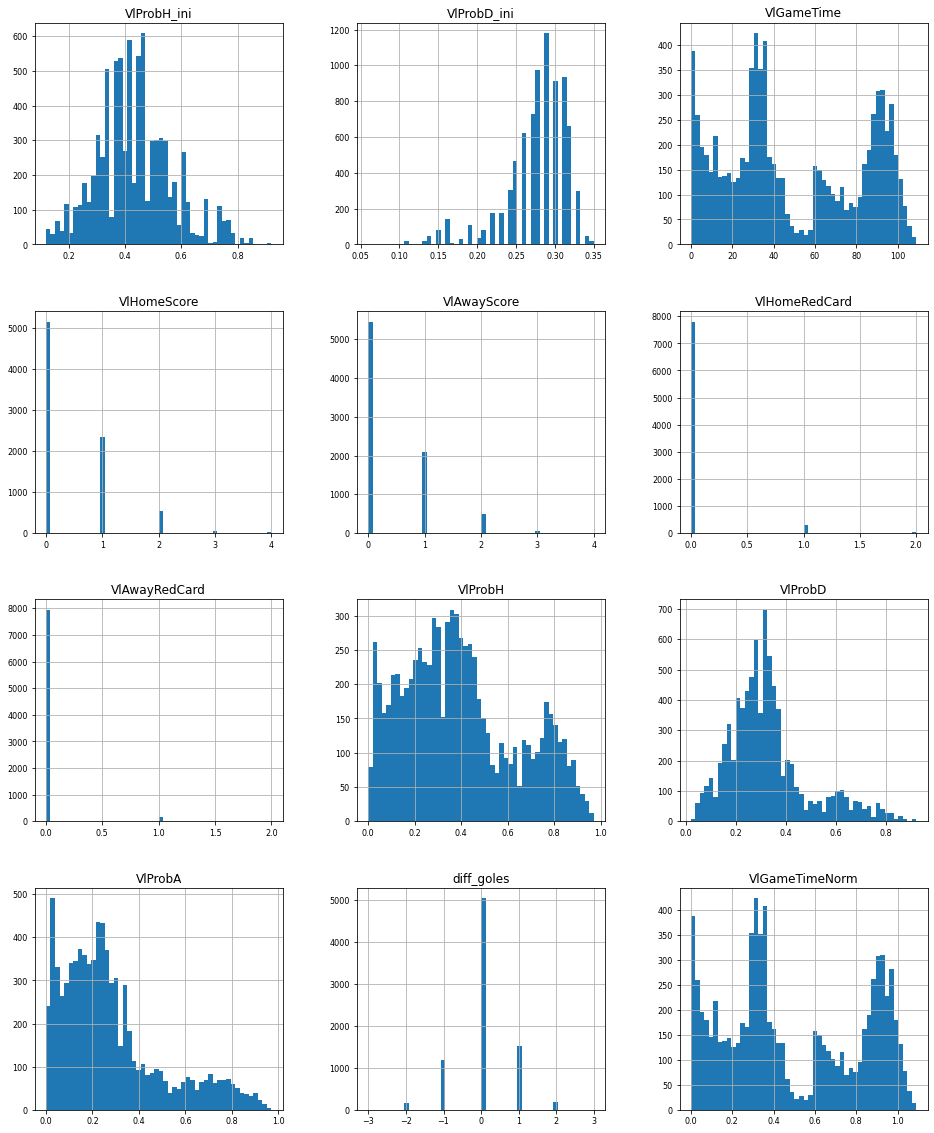

In [62]:
train.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

In [64]:
X_train.columns

Index(['VlProbH_ini', 'VlProbD_ini', 'VlGameTime', 'VlHomeScore',
       'VlAwayScore', 'VlHomeRedCard', 'VlAwayRedCard', 'diff_goles',
       'VlGameTimeNorm'],
      dtype='object')

In [66]:
X_train = X_train[['diff_goles','VlGameTimeNorm','VlProbD_ini',
                   'VlProbH_ini','VlHomeRedCard','VlAwayRedCard'
                  ]]

X_train.shape

(8099, 6)

In [67]:
X_test = X_test[['diff_goles','VlGameTimeNorm','VlProbD_ini',
                   'VlProbH_ini','VlHomeRedCard','VlAwayRedCard'
                  ]]

X_test.shape

(1501, 6)

In [68]:
from keras import Sequential
from keras.layers import Dense
from keras.layers.core import Activation

model = Sequential()
model.add(Dense(units=30, input_dim=6))
model.add(Activation('tanh'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                210       
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 93        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
history = model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=100,
                    validation_split = 0.1
                    )


Train on 7289 samples, validate on 810 samples
Epoch 1/100
7289/7289 [==============================] - 2s 232us/step - loss: 0.0301 - val_loss: 0.0177
Epoch 2/100
7289/7289 [==============================] - 1s 156us/step - loss: 0.0137 - val_loss: 0.0117
Epoch 3/100
7289/7289 [==============================] - 1s 177us/step - loss: 0.0102 - val_loss: 0.0095: 0s - loss - ETA: 0s - loss: 0.
Epoch 4/100
7289/7289 [==============================] - 2s 256us/step - loss: 0.0087 - val_loss: 0.0085
Epoch 5/100
7289/7289 [==============================] - 1s 187us/step - loss: 0.0080 - val_loss: 0.0078
Epoch 6/100
7289/7289 [==============================] - 2s 213us/step - loss: 0.0076 - val_loss: 0.0076TA: 0s - loss: 0.0 - ETA: 0s - loss: 0.00 - ETA: 0s - loss: 0.0 - ETA: 0s - lo
Epoch 7/100
7289/7289 [==============================] - 1s 192us/step - loss: 0.0074 - val_loss: 0.0075
Epoch 8/100
7289/7289 [==============================] - 1s 186us/step - loss: 0.0073 - val_loss: 0.0073
Ep

7289/7289 [==============================] - 1s 93us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 75/100
7289/7289 [==============================] - 1s 119us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 76/100
7289/7289 [==============================] - 1s 200us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 77/100
7289/7289 [==============================] - 1s 175us/step - loss: 0.0022 - val_loss: 0.0022oss: 0.002
Epoch 78/100
7289/7289 [==============================] - 1s 161us/step - loss: 0.0022 - val_loss: 0.0021ETA: 0s - loss: 0
Epoch 79/100
7289/7289 [==============================] - 1s 181us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 80/100
7289/7289 [==============================] - 1s 178us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 81/100
7289/7289 [==============================] - 2s 217us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 82/100
7289/7289 [==============================] - 1s 187us/step - loss: 0.0021 - val_loss: 0.0022
Epoch 83/100
7289/7289 [=========

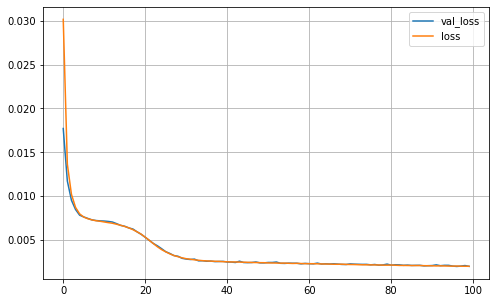

In [73]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([[0.9025282 , 0.07791891, 0.01955294],
       [0.31437573, 0.54696584, 0.13865842],
       [0.72856295, 0.20403363, 0.06740339],
       ...,
       [0.15676515, 0.6224713 , 0.2207636 ],
       [0.78065115, 0.18889746, 0.03045135],
       [0.32504803, 0.37022865, 0.3047233 ]], dtype=float32)

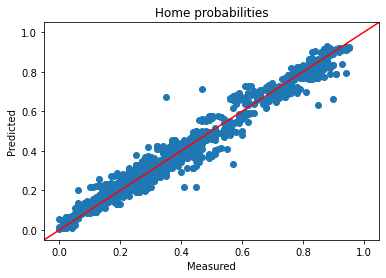

In [88]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbH,y_pred[:,0])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Home probabilities')
plt.show();

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbH,y_pred[:,0]) 
r2 =  r2_score(y_test.VlProbH,y_pred[:,0])
print(mse,r2)

0.0018653867614456653 0.969827620041285


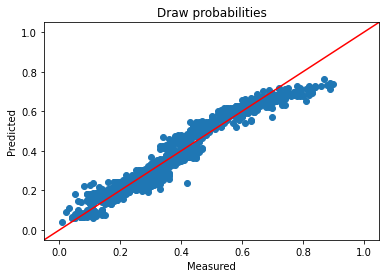

In [82]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbD,y_pred[:,1])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Draw probabilities')
plt.show();

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbD,y_pred[:,1]) 
r2 =  r2_score(y_test.VlProbD,y_pred[:,1])
print(mse,r2)

0.0015209001796888375 0.9486557026145365


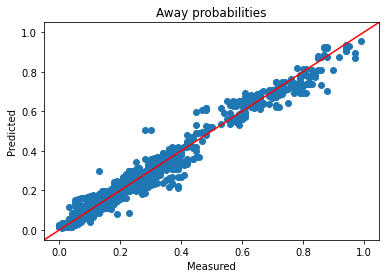

In [85]:
fig,ax = plt.subplots()
ax.scatter(y_test.VlProbA,y_pred[:,2])
ax.axline([0,0],[1,1],color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Away probabilities')
plt.show();

In [86]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.VlProbA,y_pred[:,2]) 
r2 =  r2_score(y_test.VlProbA,y_pred[:,2])
print(mse,r2)

0.0012504124338967968 0.9721414557201564


In [90]:
mean_squared_error(y_test,y_pred,multioutput='raw_values')

array([0.00186539, 0.0015209 , 0.00125041])

In [91]:
r2_score(y_test,y_pred,multioutput='raw_values')

array([0.96982762, 0.9486557 , 0.97214146])

In [92]:
# Predice los resultados para el partido de predicciones.json
datos_new = pd.read_json('data/predicciones.json')
datos_new

,TsOdd,TsElapsed,VlProbH_ini,VlProbD_ini,CoMatchState,DsMatchState,VlGameTime,VlMinute,VlHomeScore,VlAwayScore,VlHomeRedCard,VlAwayRedCard,VlProbH,VlProbD,VlProbA,NaMatch
0,2019-10-01 19:00:50,50,0.6,0.25,1,1ST0,0,0,0,0,0,0,0.60,0.25,0.15,Celta vs Valladolid
1,2019-10-01 19:09:51,591,0.6,0.25,1,1ST9,9,9,0,0,0,0,0.52,0.30,0.18,Celta vs Valladolid
2,2019-10-01 20:48:32,6452,0.6,0.25,3,2ST90+,107,92,1,0,0,0,0.95,0.05,0.00,Celta vs Valladolid
3,2019-10-01 20:33:53,5573,0.6,0.25,3,2ST77,92,77,1,0,0,0,0.87,0.12,0.01,Celta vs Valladolid
4,2019-10-01 20:04:27,3807,0.6,0.25,3,2ST48,63,48,1,0,0,0,0.79,0.16,0.05,Celta vs Valladolid
5,2019-10-01 20:38:56,5876,0.6,0.25,3,2ST82,97,82,1,0,0,0,0.89,0.10,0.01,Celta vs Valladolid
6,2019-10-01 19:12:51,771,0.6,0.25,1,1ST12,12,12,0,0,0,0,0.52,0.30,0.18,Celta vs Valladolid
7,2019-10-01 19:31:10,1810,0.6,0.25,1,1ST30,30,30,1,0,0,0,0.76,0.18,0.06,Celta vs Valladolid
8,2019-10-01 20:48:41,6461,0.6,0.25,3,2ST90+,107,92,1,0,0,0,0.94,0.06,0.00,Celta vs Valladolid
9,2019-10-01 20:34:05,5585,0.6,0.25,3,2ST78,93,78,1,0,0,0,0.87,0.12,0.01,Celta vs Valladolid


In [93]:
datos_new['diff_goles'] = datos_new.VlHomeScore-datos_new.VlAwayScore
datos_new['VlGameTimeNorm'] = datos_new.VlGameTime/110

In [94]:
df=datos_new[['diff_goles','VlGameTimeNorm','VlProbD_ini','VlProbH_ini','VlHomeRedCard','VlAwayRedCard']]

In [95]:
y_pred = model.predict(df)

In [96]:
r2_score(datos_new[['VlProbH','VlProbD','VlProbA']]
         ,y_pred,multioutput='raw_values')

array([0.87496914, 0.73924143, 0.96415292])

In [97]:
mean_squared_error(datos_new[['VlProbH','VlProbD','VlProbA']]
         ,y_pred,multioutput='raw_values')

array([0.00284388, 0.00181755, 0.00016774])

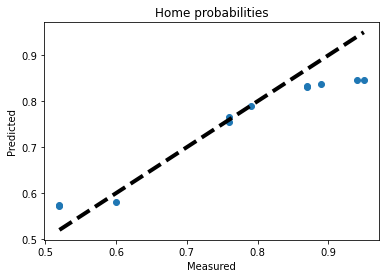

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(datos_new.VlProbH.values, y_pred[:,0])
ax.plot([datos_new.VlProbH.values.min(), datos_new.VlProbH.values.max()], [datos_new.VlProbH.values.min(), datos_new.VlProbH.values.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Home probabilities')
plt.show()